# GESTURE RECOGNITION

## 1. INTRODUCTION

### 1.1 Data

The library, uWaveGestureLibrary, consists over 4000 instances each of which has the accelerometer readings in three dimensions (i.e. x, y and z). This data is the gesture pattern of eight users. All rows are an instance. First column is the class of the gesture, which are stated from one to eight. The columns from second to last are the time ordered observations in the corresponding axis. There are 3 files that are related to X, Y and Z axes.

### 1.2 Objective

In this assignment, we want to apply principle component analysis (PCA) to be able to describe the 3D information in 1D. Also, we try to reduce the dimension of the time order from 315 to 2. So, we can use much more less column to describe the gesture of the user.
Throughout the assignment, we will use __numpy__, __pandas__, __datatable__, __matplotlib.pyplot__, __plotly.graph_objects__, __random__, __sklearn.decomposition.PCA__, __sklearn.manifold.MDS__ and __sklearn.metrics.pairwise.manhattan_distances__ packages.

## 2. TASKS

### 2.1 Packages and Funcitons

In [1]:
## Importing Packages
import numpy as np
import pandas as pd
from datatable import dt, by
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Following functions are created in order to accomplish the objective. First function, *prepare_data*, is used to import the data and rename the columns. Second function, *transform_long*, is used to transform the wide data into long data, which is called melting the data. Third function, *cal_pos*, is used to calculate the position information from accelerometer information, which taking the cumulative summation of the cumulative summation of accelerometer. Fourth function, *pca_plot*, is used to plot the first component of the PCA result. In the plot, we randomly pick 2 instances of the class. The fifth function, *pca_class*, is used to apply PCA to each class separately.

In [2]:
def prepare_data(path, ax):
    df = pd.read_csv(path, sep = '\s+', header = None)
    columns = [ax + 'T' + str(i) for i in range(1, df.shape[1])]
    columns.insert(0, 'class')
    df.columns = columns
    df['class'] = df['class'].astype(int)
    return df

def transform_long(df, ax):
    df2 = df.copy()
    df2['time series'] = range(1, df2.shape[0] + 1)
    data_long = pd.melt(df2, 
                        id_vars = ['class', 'time series'],
                        value_vars = list(df2.columns[1:df2.shape[1] - 1]),
                        var_name = 'time index',
                        value_name = ax)
    data_long['time index'] = data_long['time index'].apply(lambda x: int(x[2:]))
    data_long.sort_values(by = ['time series', 'time index'], ignore_index = True, inplace = True)
    return data_long

def cal_pos(df, ax):
    DT = dt.Frame(df)
    x = DT[15, :, by("class")][:, 1:]
    x = x.to_pandas()
    y = x.transpose()
    cum_sum_y = y.apply(lambda x: x.cumsum())
    cum_sum_y_2 = cum_sum_y.apply(lambda x: x.cumsum())
    columns1 = [ax + '_' + str(i) for i in range(1, y.shape[1] + 1)]
    columns2 = ["vel_" + str(i) for i in range(1, cum_sum_y.shape[1] + 1)]
    columns3 = ["pos_" + str(i) for i in range(1, cum_sum_y_2.shape[1] + 1)]
    columns = columns1 + columns2 + columns3
    y = pd.concat([y, cum_sum_y, cum_sum_y_2], axis=1)
    y.columns = columns
    return y

def pca_plot(value):
    series = x_train_long.loc[x_train_long['class'] == value, 'time series'].unique()
    random.seed(12345)
    randoms = random.sample(set(series),2)
    
    plot_data = data_long[data_long['time series'].isin(randoms)]
    _ = plt.scatter(plot_data['time index'], plot_data['PCA1'], c = plot_data['time series'])
    _ = plt.title("1D Representation of Data For Class" + str(value))
    _ = plt.xlabel("Time Index")
    _ = plt.ylabel("First Component")

def pca_class(value):
    df = data_long[data_long['class'] == value]
    pca = PCA(n_components = 1)
    pca_result = pca.fit_transform(df.iloc[:, 2:6])
    return (pca.explained_variance_ratio_)

### 2.2 Data Manupilation

With following steps, we imported the data, created a wide and long format of the data.

In [3]:
x_train = prepare_data("https://drive.google.com/uc?export=download&id=1KDhDT0FE5lkjvn62YTCJ87vZ7A5uS5TT", "X")
y_train = prepare_data("https://drive.google.com/uc?export=download&id=1fZCNBdJ40Df5werSu_Ud4GUmCBcBIfaI", "Y")
z_train = prepare_data("https://drive.google.com/uc?export=download&id=1jdZ2_NiFil0b4EbLBAfDJ43VQcOgulpf", "Z")

data_wide = pd.concat([x_train, y_train.iloc[:, 1:y_train.shape[1]], z_train.iloc[:, 1:z_train.shape[1]]], axis = 1)

x_train_long = transform_long(x_train, 'X')
y_train_long = transform_long(y_train, 'Y')
z_train_long = transform_long(z_train, 'Z')

x_y_merge = pd.merge(x_train_long, y_train_long, on = ["time series", "time index", "class"], how = 'left')
data_long = pd.merge(x_y_merge, z_train_long, on = ["time series", "time index", "class"], how = 'left')

cols = data_long.columns.tolist()
cols = cols[1:] + cols[:1]
data_long = data_long[cols]

These are the head of all data that we created.

In [4]:
print(x_train.head())
print(y_train.head())
print(z_train.head())
print(data_wide.head())
print(x_train_long.head())
print(y_train_long.head())
print(z_train_long.head())
print(data_long.head())

   class       XT1       XT2       XT3       XT4       XT5       XT6  \
0      6 -0.304243 -0.304243 -0.304243 -0.304243 -0.304243 -0.304243   
1      5  1.627311  1.627311  1.627311  1.627311  1.627311  1.627311   
2      5  0.661277  0.661277  0.661277  0.661277  0.661277  0.661277   
3      3  0.005185  0.005185  0.005185  0.005185  0.005185  0.005185   
4      4  1.286198  1.286198  1.286198  1.286198  1.286198  1.286198   

        XT7       XT8       XT9  ...     XT306     XT307     XT308     XT309  \
0 -0.304243 -0.304243 -0.304243  ... -0.796414 -0.741728 -0.694698 -0.647669   
1  1.627311  1.627311  1.627311  ... -0.237634 -0.237634 -0.237634 -0.237634   
2  0.661277  0.661277  0.661277  ... -0.282011 -0.236929 -0.191848 -0.146766   
3  0.005185  0.005185  0.005185  ...  1.207290  1.147822  1.094344  1.060362   
4  1.286198  1.286198  1.286198  ... -1.436983 -1.436983 -1.436983 -1.436983   

      XT310     XT311     XT312     XT313     XT314     XT315  
0 -0.647669 -0.647669 

### 2.3 Task A

We can plot the data in 3D. To do so, we used the _plotly_ package and coordinate information.

In [5]:
x_pos = cal_pos(x_train, 'X')
y_pos = cal_pos(y_train, 'Y')
z_pos = cal_pos(z_train, 'Z')

fig = go.Figure()

for i in range(1, 9):
    cols = "pos_" + str(i)
    fig = go.Figure(data=[go.Scatter3d(
        x=x_pos.loc[:,cols],
        y=y_pos.loc[:,cols],
        z=z_pos.loc[:,cols],
        mode='markers',
        marker=dict(
            size=12,
            color='blue',
            colorscale='Viridis',
            opacity=0.8
        )
    )])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                      title=dict(text = "3D Representation of Accelerometer for Class " + str(i)))
    fig.show()

Even if they are not the same, these plots are the graphical (3D) representation of the gestures shown below.

<center>

![Gesture classes](gestures.png)

### 2.4 Task B

We can apply PCA to get 1D information from 3D. Before that we need to check the scale of the data. If they are not in the same scale, we need to standardize the data to make them in the same scale. 

In this step, we are using the accelerometer information. Another possibility would be to use the position information of all instances. 

In [6]:
print(x_train.iloc[:, 1:].apply(np.mean, axis = 1).head())
print(x_train.iloc[:, 1:].apply(np.std, axis = 1).head())
print(y_train.iloc[:, 1:].apply(np.mean, axis = 1).head())
print(y_train.iloc[:, 1:].apply(np.std, axis = 1).head())
print(z_train.iloc[:, 1:].apply(np.mean, axis = 1).head())
print(z_train.iloc[:, 1:].apply(np.std, axis = 1).head())

0   -6.317458e-10
1   -6.673017e-09
2    1.633651e-09
3   -2.000000e-10
4    8.399683e-09
dtype: float64
0    0.998411
1    0.998411
2    0.998411
3    0.998411
4    0.998411
dtype: float64
0    1.730158e-09
1   -1.482539e-09
2    3.675873e-09
3    4.441271e-10
4    5.396828e-10
dtype: float64
0    0.998411
1    0.998411
2    0.998411
3    0.998411
4    0.998411
dtype: float64
0    4.174604e-09
1   -1.059683e-09
2   -6.152386e-10
3   -4.825398e-10
4   -5.166667e-09
dtype: float64
0    0.998411
1    0.998411
2    0.998411
3    0.998411
4    0.998411
dtype: float64


When we look at the mean and standard deviation of all data, they all have zero mean and 1 standard deviation, which means that the data is ready for PCA.

In [7]:
pca = PCA(n_components = 1)
pca_result = pca.fit_transform(data_long.iloc[:, 2:5])
print(pca.explained_variance_ratio_)

data_long["PCA1"] = pca_result

[0.49059498]


When we observe the summary output, we see that with one principal component we can almost explain the 50% of the data. We can plot them with time index information. To be able to compare their information, we need to use the 3D scatter plot of the accelerometer information. If they look the same, we can say that to reduce the data from 3D to 1D is a good method.

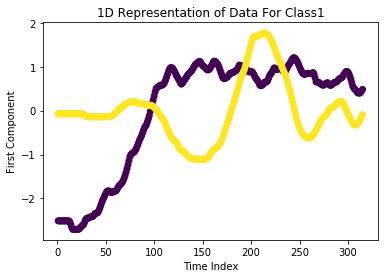

In [8]:
pca_plot(1)

In [9]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_1"],
    y=y_pos.loc[:,"Y_1"],
    z=z_pos.loc[:,"Z_1"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 1"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

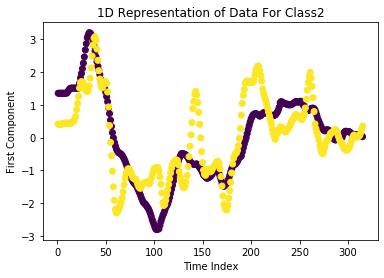

In [10]:
pca_plot(2)

In [11]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_2"],
    y=y_pos.loc[:,"Y_2"],
    z=z_pos.loc[:,"Z_2"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 2"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

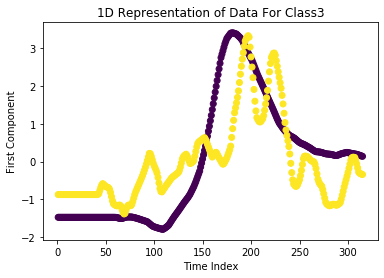

In [12]:
pca_plot(3)

In [13]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_3"],
    y=y_pos.loc[:,"Y_3"],
    z=z_pos.loc[:,"Z_3"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 3"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

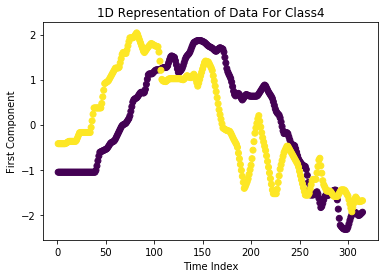

In [14]:
pca_plot(4)

In [15]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_4"],
    y=y_pos.loc[:,"Y_4"],
    z=z_pos.loc[:,"Z_4"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 4"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

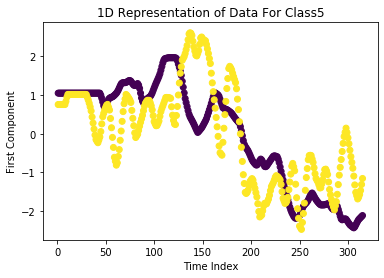

In [16]:
pca_plot(5)

In [17]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_5"],
    y=y_pos.loc[:,"Y_5"],
    z=z_pos.loc[:,"Z_5"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 5"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

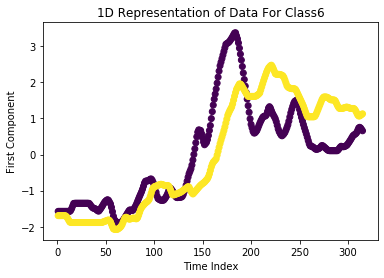

In [18]:
pca_plot(6)

In [19]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_6"],
    y=y_pos.loc[:,"Y_6"],
    z=z_pos.loc[:,"Z_6"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 6"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

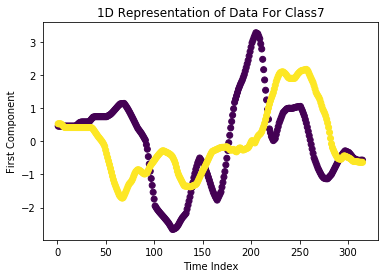

In [20]:
pca_plot(7)

In [21]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_7"],
    y=y_pos.loc[:,"Y_7"],
    z=z_pos.loc[:,"Z_7"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 7"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

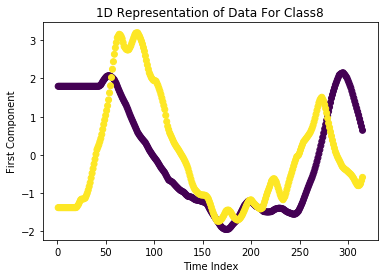

In [22]:
pca_plot(8)

In [23]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_pos.loc[:,"X_8"],
    y=y_pos.loc[:,"Y_8"],
    z=z_pos.loc[:,"Z_8"],
    mode='markers',
    marker=dict(
        size=12,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title=dict(text = "3D Representation of Accelerometer for Class 8"))
fig.show()

From the plot above, we can not say that they are similar. But, when we compare the two random data points within each other, we can say that they have similar information.

This is the expected result. Because, as in the summary of the PCA, one component can only explain the half of the data. So, we lose some information in this process.

### 2.5 Task C

Another approach would be to apply the PCA process for every class individually. We can expect to get better result with this approach, because we can reduce the variance among the classes. 

In [24]:
exp_var_rat1 = pca_class(1)
print(exp_var_rat1)

[0.46253306]


When we look at the summary, we see that 46% of the data can be explained with one component. It is worse than the general PCA result if we want to explain the class 1.

In [25]:
exp_var_rat2 = pca_class(2)
print(exp_var_rat2)

[0.51254787]


When we look at the summary, we see that 51% of the data can be explained with one component. It is better than the general PCA result if we want to explain the class 2.

In [26]:
exp_var_rat3 = pca_class(3)
print(exp_var_rat3)

[0.54074403]


When we look at the summary, we see that 54% of the data can be explained with one component. It is better than the general PCA result if we want to explain the class 3.

In [27]:
exp_var_rat4 = pca_class(4)
print(exp_var_rat4)

[0.55012869]


When we look at the summary, we see that 55% of the data can be explained with one component. It is better than the general PCA result if we want to explain the class 4.

In [28]:
exp_var_rat5 = pca_class(5)
print(exp_var_rat5)

[0.6472234]


When we look at the summary, we see that 65% of the data can be explained with one component. It is better than the general PCA result if we want to explain the class 5.

In [29]:
exp_var_rat6 = pca_class(6)
print(exp_var_rat6)

[0.57182387]


When we look at the summary, we see that 57% of the data can be explained with one component. It is better than the general PCA result if we want to explain the class 6.

In [30]:
exp_var_rat7 = pca_class(7)
print(exp_var_rat7)

[0.5192033]


When we look at the summary, we see that 52% of the data can be explained with one component. It is better than the general PCA result if we want to explain the class 7.

In [31]:
exp_var_rat8 = pca_class(8)
print(exp_var_rat8)

[0.61342685]


When we look at the summary, we see that 61% of the data can be explained with one component. It is better than the general PCA result if we want to explain the class 8.

In general, we can say that applying PCA for every class gives better result than applying to all class. This approach is applicable for this data, because we have only eight class. If we have many more class than eight, it would be more time consuming process.

### 2.6 Task D

When we look at the data, we can see that there are 315 time ordered information. This is a huge number to consider as feature number in a model. So, to reduce the number of feature is a good approach. To do so, we can use multi dimensional scaling (MDS) approach. Before this approach, we need to have distance matrix of the data. We can get distance matrix with *dist* function. We used _manhattan_ method as calculating the distance, because we need to sum all distances of axes and this summation will be in a way like manhattan. So, to maintain the consistency, we should use the manhattan method. If we want to use euclidean method, we need to sum all axes' distance in euclidean method, too.

In [32]:
x_train_distance = manhattan_distances(x_train.iloc[:, 1:317])
y_train_distance = manhattan_distances(y_train.iloc[:, 1:317])
z_train_distance = manhattan_distances(z_train.iloc[:, 1:317])

data_distance = x_train_distance + y_train_distance + z_train_distance
data_distance.shape

(896, 896)

Now, we have a 896 x 896 distance matrix. After preparing the data, we can apply the MDS process and plot the result with respect to classes.

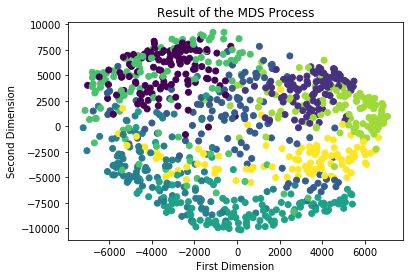

In [33]:
embedding = MDS(n_components=2)
mds = embedding.fit_transform(data_distance)
mds = pd.DataFrame({"class": x_train.iloc[:,0].values, "D1": mds[:,0], "D2": mds[:,1]})

_ = plt.scatter(mds['D1'], mds['D2'], c = mds['class'])
_ = plt.title("Result of the MDS Process")
_ = plt.xlabel("First Dimension")
_ = plt.ylabel("Second Dimension")

When we look at the plot, we can see some interesting parts. Recall the classes 3 and 4, which are the opposite way of themselves. When we look at the plot, instances of class 3 have positive values in the first dimension and negative values in the second dimension. From class 4 respective, it has negative values in the first dimension and positive values in the second dimension. They are still negatively correlated in this reduced form. We can see the similar proposition between 5 & 6 and 7 & 8. Also, all members of any classes are plotted in the same region. So, as a result, this MDS process is a successful process.